<a href="https://colab.research.google.com/github/goldenkiwi-hyeuk/202112python/blob/main/Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
# 필요한 라이브러리 import
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [95]:
# mnist 데이터 저장 및 훈련용과 검증용 분리
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [96]:
print(X_train)
print(y_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
[5 0 4 ... 5 6 8]


In [97]:
X_train, X_test = X_train/255.0, X_test/255.0 
#? float를 기반으로 한다는것은 수업을 통해서 알고 있었음 그러나 0과 1사이의 숫자로 나누는 이유는?
X_train = tf.reshape(X_train, [-1,784])
# 차원 낮추기
X_test = tf.reshape(X_test, [-1,784])
# 차원 낮추기
print(X_train)
print(X_test)

tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(60000, 784), dtype=float64)
tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(10000, 784), dtype=float64)


In [98]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
# 원핫 인코딩
y_test = tf.keras.utils.to_categorical(y_test, 10)
# 원핫 인코딩
print(y_train)
print(y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [104]:
model = tf.keras.Sequential([
           keras.layers.Dense(128, activation=tf.nn.relu),
           keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [113]:
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["acc"])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (32, 128)                 100480    
                                                                 
 dense_15 (Dense)            (32, 10)                  1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [110]:
history = model.fit(X_train, y_train, epochs= 10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2599 - acc: 0.9248
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1128 - acc: 0.9665
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0779 - acc: 0.9757
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0573 - acc: 0.9826
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0446 - acc: 0.9859
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0354 - acc: 0.9891
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0266 - acc: 0.9924
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0230 - acc: 0.9928
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0179 - acc: 0.9945
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0158 - acc: 0.9951


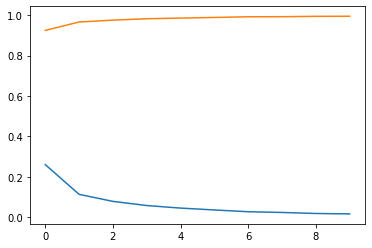

In [112]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label = 'loss')
plt.plot(history.history['acc'],label = 'acc')

In [115]:
loss, acc = model.evaluate(X_test, y_test)  # 학습 완료 후 검증
print("손실률:", loss)
print("정확도:", acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0776 - acc: 0.9786
손실률: 0.07763247936964035
정확도: 0.978600025177002
